## Creating the data

In [61]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [62]:
from res.plot_lib import plot_data, plot_model, set_default

In [63]:
set_default()

In [64]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [65]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000 #num of samples per class
D = 2 # dimensions
C = 3 # num classes
H = 100 # num hidden units

In [66]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype = torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linspace
    # The below inner variable is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    )  + torch.randn(N) * 0.2

    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print('Shapes: ')
print("X: ", tuple(X.size()))
print("Y: ", tuple(y.size()))

Shapes: 
X:  (3000, 2)
Y:  (3000,)


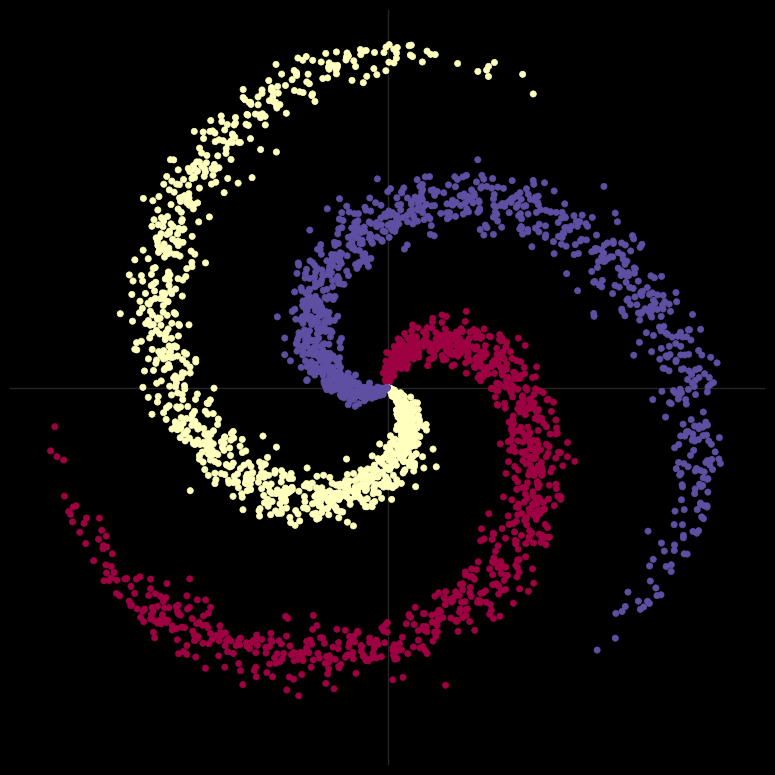

In [67]:
# visualising the data
plot_data(X, y)

## Linear Model

In [68]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [69]:
# We create a sequential box with our linear models containing weights and biases
model = nn.Sequential(
        nn.Linear(D, H),
        nn.Linear(H, C)
)
model.to(device)

# using cross entropy loss for the classification task.
criterion = torch.nn.CrossEntropyLoss()

# Using Adam as the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= lambda_l2)

# Training
for t in range(1000):
     # The forward pass
     y_pred = model(X)

     # Computing the loss and accuracy
     loss = criterion(y_pred, y)
     score, predicted = torch.max(y_pred, 1) # torch.max with axis 1 would return the max value in that row and its position.
     acc = (y == predicted).sum().float() / len(y)

     if t % 100 == 0:
         print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
     
    #  display.clear_output(wait = True) # This would erase previous print statements

     # zeroing the gradients before backward pass
     optimizer.zero_grad()

     # computing the gradients with respect to the learnable parameters
     loss.backward()

     # updating the parameters
     optimizer.step()

[EPOCH]: 0, [LOSS]: 1.109827, [ACCURACY]: 0.333
[EPOCH]: 100, [LOSS]: 0.777753, [ACCURACY]: 0.507
[EPOCH]: 200, [LOSS]: 0.775230, [ACCURACY]: 0.507
[EPOCH]: 300, [LOSS]: 0.775228, [ACCURACY]: 0.507
[EPOCH]: 400, [LOSS]: 0.775228, [ACCURACY]: 0.507
[EPOCH]: 500, [LOSS]: 0.775228, [ACCURACY]: 0.507
[EPOCH]: 600, [LOSS]: 0.775228, [ACCURACY]: 0.507
[EPOCH]: 700, [LOSS]: 0.775228, [ACCURACY]: 0.507
[EPOCH]: 800, [LOSS]: 0.775228, [ACCURACY]: 0.507
[EPOCH]: 900, [LOSS]: 0.775228, [ACCURACY]: 0.507


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


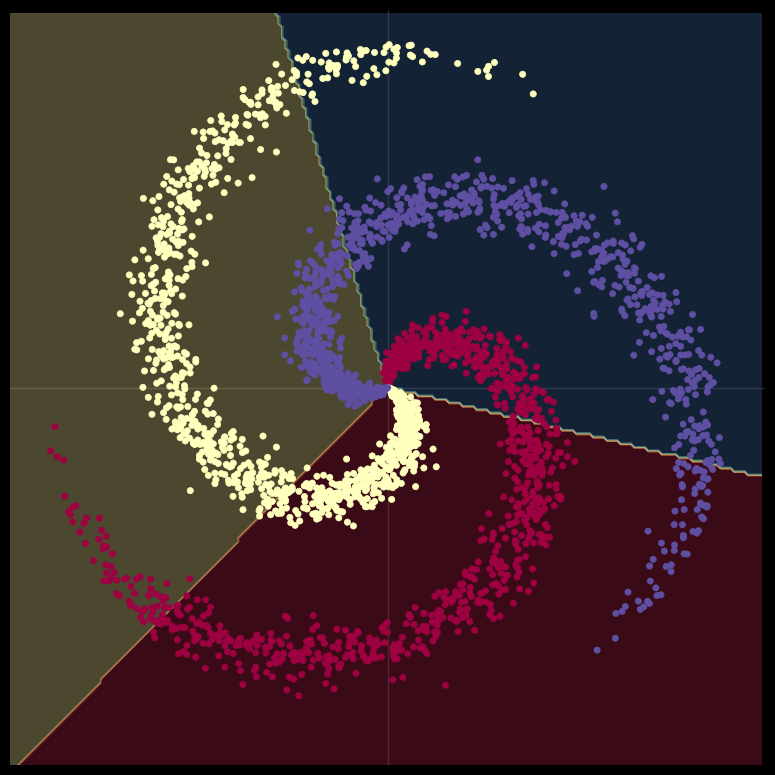

In [70]:
# plotting trained model
print(model)
plot_model(X, y ,model)

## Two Layered Network

In [71]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [72]:
# We create a sequential box with our linear models containing weights and biases
model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU(),
        nn.Linear(H, C)
)
model.to(device)

# using cross entropy loss for the classification task.
criterion = torch.nn.CrossEntropyLoss()

# Using SGD as the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= lambda_l2)

# Training
for t in range(1000):
     # The forward pass
     y_pred = model(X)

     # Computing the loss and accuracy
     loss = criterion(y_pred, y)
     score, predicted = torch.max(y_pred, 1) # torch.max with axis 1 would return the max value in that row and its position.
     acc = (y == predicted).sum().float() / len(y)

     if t % 100 == 0:
         print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
     
    #  display.clear_output(wait = True) # This would erase previous print statements

     # zeroing the gradients before backward pass
     optimizer.zero_grad()

     # computing the gradients with respect to the learnable parameters
     loss.backward()

     # updating the parameters
     optimizer.step()

[EPOCH]: 0, [LOSS]: 1.123080, [ACCURACY]: 0.186
[EPOCH]: 100, [LOSS]: 0.762568, [ACCURACY]: 0.550
[EPOCH]: 200, [LOSS]: 0.635134, [ACCURACY]: 0.625
[EPOCH]: 300, [LOSS]: 0.532769, [ACCURACY]: 0.727
[EPOCH]: 400, [LOSS]: 0.441892, [ACCURACY]: 0.792
[EPOCH]: 500, [LOSS]: 0.370221, [ACCURACY]: 0.838
[EPOCH]: 600, [LOSS]: 0.314751, [ACCURACY]: 0.868
[EPOCH]: 700, [LOSS]: 0.270714, [ACCURACY]: 0.894
[EPOCH]: 800, [LOSS]: 0.234257, [ACCURACY]: 0.915
[EPOCH]: 900, [LOSS]: 0.203616, [ACCURACY]: 0.936


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


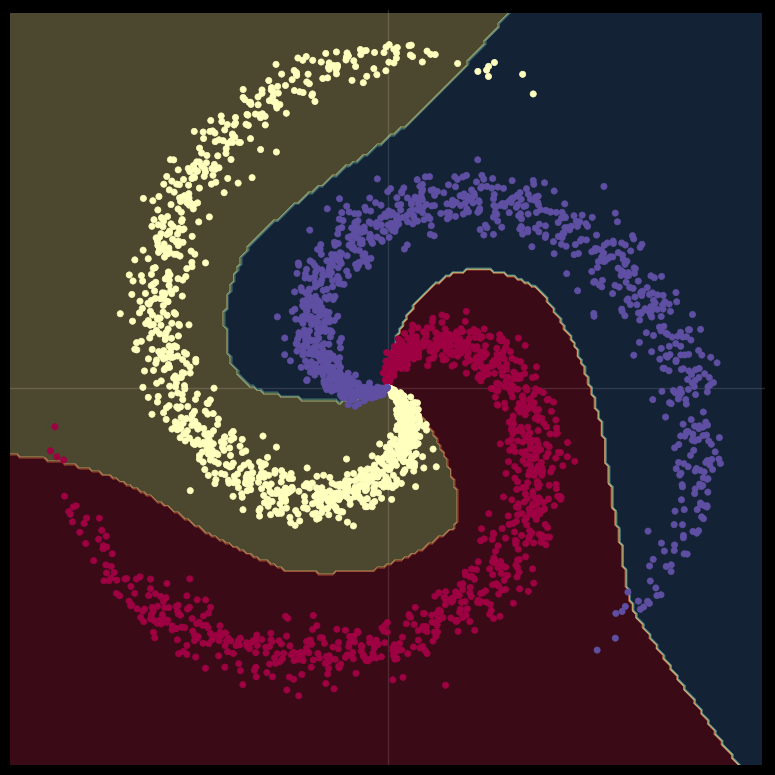

In [73]:
# plotting trained model
print(model)
plot_model(X, y ,model)

We can finally observe how using a non linear function made all the difference to the decision boundaries as well as the accuracy.